In [1]:
import pandas as pd

# --- Build the datasets --- #
%run -n ./HW4-datasets.ipynb
    
# --- Load the datasets --- #
ras_df = pd.read_csv('Patterned_Arithmetic_Sequences.csv')
ks_df = pd.read_csv('Patterned_Key_Sequences.csv')

Datasets saved as 'Arithmetic_Sequences.csv' and 'Key_Sequences.csv'.


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# --- Normalize the Reverse Arithmetic Sequences --- #
scaler = MinMaxScaler()
ras_scaled = scaler.fit_transform(ras_df.values)

ras_X = ras_scaled[:, :-1]
ras_y = ras_scaled[:, -1]

ras_X = ras_X.reshape(ras_X.shape[0], ras_X.shape[1], 1)

# --- OneHotEncode the Key Sequences --- #
unique_keys = np.unique(ks_df.values)
n_classes = len(unique_keys)
time_steps_total = ks_df.shape[1]

enc = OneHotEncoder(sparse_output=False, dtype=int)

ks_flat = enc.fit_transform(ks_df.values)
ks_reshaped = ks_flat.reshape(ks_df.shape[0], time_steps_total, n_classes)

ks_X = ks_reshaped[:, :-1, :]
ks_y = ks_reshaped[:, -1, :]

In [3]:
from sklearn.model_selection import train_test_split

# --- Split the data to test and train sets --- #
def split_data(X, y):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, shuffle=False)
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

ras_train, ras_val, ras_test = split_data(ras_X, ras_y)
ks_train, ks_val, ks_test = split_data(ks_X, ks_y)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# --- Reverse Arithmetic Sequences RNN --- #
model_ras = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(ras_train[0].shape[1], 1)),
    Dense(1)
])

model_ras.compile(optimizer='adam', loss='mse')

history_ras = model_ras.fit(
    ras_train[0], ras_train[1],
    validation_data=(ras_val[0], ras_val[1]),
    epochs=50, verbose=1
)

Epoch 1/50


/Users/maddox/progz/CS-583/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.1508 - val_loss: 0.1303
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1227 - val_loss: 0.1023
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0968 - val_loss: 0.0753
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0699 - val_loss: 0.0502
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0458 - val_loss: 0.0267
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0232 - val_loss: 0.0087
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0085 - val_loss: 0.0041
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0054 - val_loss: 0.0080
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0075 - val_loss: 0.0050
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0037 - val_loss: 7.7736e-04
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.2650e-04 - val_loss: 0.0022
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0025 - val_loss: 0.0025
Epoc

In [5]:

# --- Key Sequence RNN --- #
model_ks = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(ks_train[0].shape[1], n_classes)),
    Dense(n_classes, activation='softmax')
])

model_ks.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_ks = model_ks.fit(
    ks_train[0], ks_train[1],
    validation_data=(ks_val[0], ks_val[1]),
    epochs=50, verbose=1
)

Epoch 1/50


/Users/maddox/progz/CS-583/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.1286 - loss: 1.6977 - val_accuracy: 0.2000 - val_loss: 1.6008
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1714 - loss: 1.5925 - val_accuracy: 0.7000 - val_loss: 1.4951
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7000 - loss: 1.4942 - val_accuracy: 0.7000 - val_loss: 1.3966
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7000 - loss: 1.3995 - val_accuracy: 0.7000 - val_loss: 1.2925
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7000 - loss: 1.2992 - val_accuracy: 0.7000 - val_loss: 1.1852
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7000 - loss: 1.1979 - val_accuracy: 0.7000 - val_loss: 1.0695
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7286 - loss: 1.0860 - val_accuracy: 0.8000 - val_loss: 0.9438
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8000 - loss: 0.9752 - val_accuracy: 1.0000 - val_loss: 0.8196
Epoch 9/50

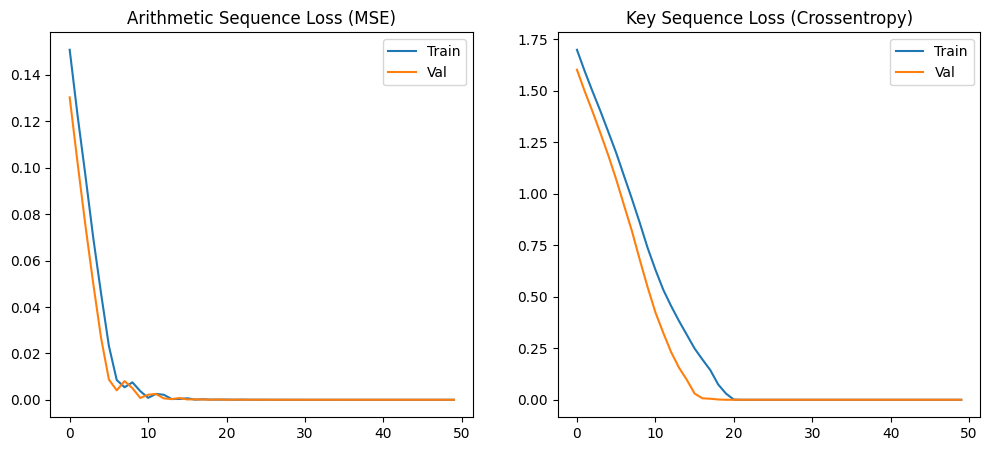

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# --- Arithmetic Loss Plot --- #
plt.subplot(1, 2, 1)
plt.plot(history_ras.history['loss'], label='Train')
plt.plot(history_ras.history['val_loss'], label='Val')
plt.title('Arithmetic Sequence Loss (MSE)')
plt.legend()

# --- Key Sequence Loss Plot --- #
plt.subplot(1, 2, 2)
plt.plot(history_ks.history['loss'], label='Train')
plt.plot(history_ks.history['val_loss'], label='Val')
plt.title('Key Sequence Loss (Crossentropy)')
plt.legend()
plt.show()

In [7]:
print("\n--- Reverse Arithmetic Results (First 5 Test Samples) ---")
pred_ras = model_ras.predict(ras_test[0])

dummy = np.zeros((len(pred_ras), ras_df.shape[1]))
dummy[:, -1] = pred_ras.flatten()
pred_real = scaler.inverse_transform(dummy)[:, -1]

dummy[:, -1] = ras_test[1].flatten()
actual_real = scaler.inverse_transform(dummy)[:, -1]

for i in range(5):
    print(f"Predicted: {pred_real[i]:.2f} | Actual: {actual_real[i]:.2f}")


print("\n--- Key Sequence Results (First 5 Test Samples) ---")
pred_ks = model_ks.predict(ks_test[0]) 

pred_idx = np.argmax(pred_ks, axis=1)
actual_idx = np.argmax(ks_test[1], axis=1)

key_labels = enc.categories_[0]

for i in range(5):
    print(f"Predicted: {key_labels[pred_idx[i]]} | Actual: {key_labels[actual_idx[i]]}")


--- Reverse Arithmetic Results (First 5 Test Samples) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted: 430.43 | Actual: 429.00
Predicted: 1353.07 | Actual: 1350.00
Predicted: 603.83 | Actual: 601.00
Predicted: 2243.62 | Actual: 2238.00
Predicted: 676.02 | Actual: 673.00

--- Key Sequence Results (First 5 Test Samples) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted: R | Actual: R
Predicted: W | Actual: W
Predicted: R | Actual: R
Predicted: Y | Actual: Y
Predicted: R | Actual: R
